<a href="https://colab.research.google.com/github/EDTuliocd/EDTuliocd/blob/main/2Copia_de_Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sc
import math
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

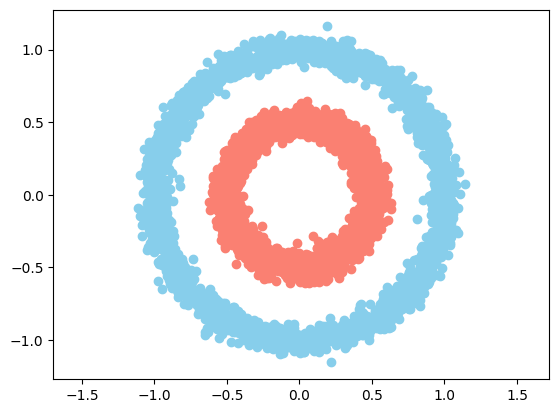

In [10]:
# create dataset
# number of registers
n = 5000
# number of characteristics of our dataset (for each register)
p = 2
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], c="skyblue")
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [ ]:
# class of network layer
class neural_layer():
  def __init__(self, n_connections, n_neurons, a_function):
    self.a_function = a_function
    normalization = lambda x : x * 2 - 1
    # for bias
    self.b = normalization(np.random.rand(1, n_neurons))
    # for weights
    self.W = normalization(np.random.rand(n_connections, n_neurons))

In [ ]:
# activation functions
sigm = (lambda x : 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
relu = lambda x: np.maximum(0, x)
_x = np.linspace(-5, 5, 100) # 100 values from -5 to 5
plt.plot(_x, sigm[0](_x), color='green', linestyle='dashed')

In [ ]:
# design of our neural network
# l0 = neural_layer(p, 4, sigm)
# l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, a_function):
  nn = [];
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], a_function))
  return nn;

In [ ]:
topology = [p, 6, 1]
neural_network = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr )**2),
          lambda Yp, Yr: (Yp - Yr))

def train(neural_network, X, Y, l2_cost, lr = 0.5, train = True):
  out = [(None, X)]
  # forward pass: we pass our ponderate sum trough all our layers
  for l, layer in enumerate(neural_network):
    z = out[-1][1] @ neural_network[l].W + neural_network[l].b
    a = neural_network[l].a_function[0](z)
    out.append((z, a))
  # we can print our error now
  # print("error", l2_cost[0](out[-1][1], Y))
  if train:
    # backward pass
    deltas = []
    for l in reversed(range(0, len(neural_network))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_network)-1:
        # for the last layer
        deltas.insert(0, l2_cost[1](a, Y) * neural_network[l].a_function[1](a))
      else:
        # for other layers
        deltas.insert(0, deltas[0] @  W_temporal.T * neural_network[l].a_function[1](a))
      W_temporal = neural_network[l].W
      # gradient descent
      neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_network[l].W = neural_network[l].W  - out[l][1].T @ deltas[0] * lr
  return out[-1][1];
train(neural_network, X, Y, l2_cost, 0.5)

In [ ]:
import time
from IPython.display import clear_output

neural_network = create_nn(topology, sigm)
loss = []

for i in range(2800):
  pY = train(neural_network, X, Y, l2_cost, lr=0.05)
  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate (_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_network, np.array([[x0, x1]]), Y, l2_cost, train = False)[0][0]
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


In [ ]:
mensaje = input()

import random

#l.Let's generate 10 values between 5 and 50. Store valued on a list.random

my_list = []

for _ in range (5):
  rand_num = random.randint(1, 50)
  my_list.append(rand_num)

print(my_list)

# 2 - let's generate 20 odd values between 0 and 100
my_list = []

# for _ in range (20):
#   num = random.randrange(0, 50, 2)
#   my_list.aopend(num)

# print(my_list)

# 3 - Generate 10 random numbers multiple of 5
for _ in range(10):
  rand_num = random.randint(1, 10)*5
  print(rand_num)

# 4 - let's generate a list with 20 sequential numbers. You hare to present it in a random order(Randomized).

import random
# from random impot shuffle

some_nums = [i for i in range(1, 21)]
print(some_nums)
random.shuffle(some_nums)
print("Randomized: in", some_nums)